In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot') #Style sheet

In [2]:
# Load datasets
cash = pd.read_csv('https://raw.githubusercontent.com/kurtisjw/project-1-ironhack-payments-es/main/project_dataset/extract%20-%20cash%20request%20-%20data%20analyst.csv')
fees = pd.read_csv('https://raw.githubusercontent.com/kurtisjw/project-1-ironhack-payments-es/main/project_dataset/extract%20-%20fees%20-%20data%20analyst%20-%20.csv')

In [6]:
cash.head(5)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [7]:
fees.head(5)

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [8]:
# Display number of rows and columns in dataframe
cash.shape

(23970, 16)

In [9]:
# Drop rows with no user_id

cash = cash.dropna(subset = 'user_id')
cash.shape

(21867, 16)

In [10]:
fees.shape

(21061, 13)

In [11]:
# List columns in dataframe
cash.columns

Index(['id', 'amount', 'status', 'created_at', 'updated_at', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update'],
      dtype='object')

In [12]:
fees.columns

Index(['id', 'cash_request_id', 'type', 'status', 'category', 'total_amount',
       'reason', 'created_at', 'updated_at', 'paid_at', 'from_date', 'to_date',
       'charge_moment'],
      dtype='object')

In [13]:
# Show information about dataframe

cash.describe()

,id,amount,user_id,deleted_account_id
count,21867.000000,21867.000000,21867.000000,1.0
mean,14280.978049,82.641240,32581.250789,262.0
std,7789.309858,26.669831,27618.565773,NaN
min,3.000000,1.000000,34.000000,262.0
25%,7919.000000,50.000000,10804.000000,262.0
50%,14757.000000,100.000000,23773.000000,262.0
75%,21028.500000,100.000000,46965.000000,262.0
max,27010.000000,200.000000,103719.000000,262.0


In [14]:
# Show data type of each column

cash.dtypes

id                              int64
amount                        float64
status                         object
created_at                     object
updated_at                     object
user_id                       float64
moderated_at                   object
deleted_account_id            float64
reimbursement_date             object
cash_request_received_date     object
money_back_date                object
transfer_type                  object
send_at                        object
recovery_status                object
reco_creation                  object
reco_last_update               object
dtype: object

In [15]:
# Convert 'created_at' data type to to datetime
cash['created_at'] = pd.to_datetime(cash['created_at'])

In [16]:
""" Convert all date/time columns to datetime data type -

date_time_columns = cash['created_at', 'updated_at',
       'moderated_at','reimbursement_date',
       'cash_request_received_date', 'money_back_date',
       'send_at', 'reco_creation', 'reco_last_update']

cash[date_time_columns] = cash[date_time_columns].apply(pd.to_datetime, errors = 'coerce', inplace = True) """

" Convert all date/time columns to datetime data type -\n\ndate_time_columns = cash['created_at', 'updated_at',\n       'moderated_at','reimbursement_date',\n       'cash_request_received_date', 'money_back_date',\n       'send_at', 'reco_creation', 'reco_last_update']\n\ncash[date_time_columns] = cash[date_time_columns].apply(pd.to_datetime, errors = 'coerce', inplace = True) "

In [17]:
# Create subset of columns by commenting out columns that we don't want to use right now

cash_subset = cash[['id', 'amount', 'status', 'created_at', 'updated_at', 'user_id',
       # 'moderated_at', 'deleted_account_id', 'reimbursement_date',
       # 'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update']].copy()

cash_subset.head(5)

,id,amount,status,created_at,updated_at,user_id,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,NaN,NaN,NaN,NaN


In [18]:
# Check for duplicate rows in dataframe - none found
cash.loc[cash.duplicated()]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update


In [19]:
#Check for duplicated user_id

cash.loc[cash.duplicated(subset = ['user_id'])]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
76,770,60.0,rejected,2020-03-01 00:14:25.915464+00:00,2020-03-01 20:21:23.994827+00,865.0,2020-03-01 20:21:23.990717+00,NaN,2020-03-16 23:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
87,657,100.0,rejected,2020-02-10 15:57:34.916879+00:00,2020-02-10 17:56:31.339773+00,939.0,2020-02-10 17:56:31.336071+00,NaN,2020-03-11 15:57:34.916568+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
91,758,90.0,rejected,2020-02-28 10:51:11.440880+00:00,2020-02-28 14:13:21.50435+00,35.0,2020-02-28 14:13:21.501335+00,NaN,2020-03-07 23:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
115,793,100.0,rejected,2020-03-04 18:59:07.598200+00:00,2020-03-06 09:04:29.101895+00,2460.0,2020-03-06 09:04:29.098465+00,NaN,2020-03-28 23:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
120,818,100.0,rejected,2020-03-07 18:37:03.621302+00:00,2020-03-08 14:29:56.55895+00,3162.0,2020-03-08 14:29:56.555207+00,NaN,2020-04-06 18:37:03.620898+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23955,6969,100.0,money_back,2020-07-07 18:11:10.840836+00:00,2020-12-18 13:09:33.691723+00,17349.0,2020-07-08 13:41:21.995142+00,NaN,2020-08-03 22:00:00+00,2020-07-10,2020-08-04 22:00:00+00,regular,NaN,NaN,NaN,NaN
23960,26969,50.0,direct_debit_sent,2020-11-01 17:31:03.345533+00:00,2021-01-06 09:07:31.575691+00,3377.0,NaN,NaN,2021-02-05 09:06:00+00,2020-11-02,NaN,instant,2020-11-01 17:31:25.526137+00,NaN,NaN,NaN
23964,16834,100.0,money_back,2020-09-19 07:37:14.351567+00:00,2021-02-05 12:11:58.186458+00,20064.0,2020-09-19 15:37:54.670099+00,NaN,2020-10-05 22:00:00+00,2020-09-22,2021-02-05 12:11:58.131036+00,instant,2020-09-26 07:37:14.299162+00,completed,2020-10-15 22:27:12.949488+00,2021-02-05 12:11:58.134306+00
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00:00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN


In [20]:
# Check unique values of money_back_date column as there is no information in the lexique

unique_values_money_back_date = cash['money_back_date'].unique()
unique_values_money_back_date

array([nan, '2020-07-06 03:36:03.023521+00',
       '2020-06-03 05:11:35.312616+00', ...,
       '2021-02-06 20:17:49.257521+00', '2021-02-05 12:19:30.626289+00',
       '2021-02-05 13:14:19.689906+00'], dtype=object)

In [21]:
# Count total values in money_back_date column. This does NOT include NaN (Not a Number) entries
count_values_money_back_date = cash['money_back_date'].count()
count_values_money_back_date

15841

In [26]:
# Set 'created_at' column as index
cash_copy = cash.copy()
cash_copy.set_index('created_at', inplace=True)

# Group by month and count the number of operations per month. 'ME' stands for month end frequency. Other options include W, D, Q, Y (week, day, quarter,)
operations_by_month = cash_copy.resample('ME').size()

print(operations_by_month)

# The output shows the last date of each month. In pandas, when you use the resample() function to group data by time periods like months, weeks, etc., the default behavior is to label the groups with the end timestamp of each period.


created_at
2019-11-30 00:00:00+00:00       1
2019-12-31 00:00:00+00:00     230
2020-01-31 00:00:00+00:00     176
2020-02-29 00:00:00+00:00     157
2020-03-31 00:00:00+00:00     207
2020-04-30 00:00:00+00:00     418
2020-05-31 00:00:00+00:00     727
2020-06-30 00:00:00+00:00    2251
2020-07-31 00:00:00+00:00    3159
2020-08-31 00:00:00+00:00    3090
2020-09-30 00:00:00+00:00    3802
2020-10-31 00:00:00+00:00    7512
2020-11-30 00:00:00+00:00     137
Freq: ME, dtype: int64


In [27]:
#Count number of occurrences of each user_id in the cash dataframe. Displayed in descending order.

user_id_counts = cash['user_id'].value_counts()
user_id_counts

user_id
3377.0     19
2142.0     18
13851.0    18
2530.0     17
1159.0     17
           ..
4938.0      1
79289.0     1
74036.0     1
57112.0     1
64517.0     1
Name: count, Length: 10798, dtype: int64

In [28]:
# Count total number of unique user IDs in the dataframe (see also 'length' of previous ouput)
unique_user_ids = cash['user_id'].nunique()
unique_user_ids

10798

In [29]:
# Calculate average user counts (average number of transactions per user)
average_user_count = user_id_counts.mean()
average_user_count

2.0250972402296723

In [30]:
# Recap to understand each step of creating cohorts

# Extract the month from 'created_at' column to identify the month of creation of the first loan for each user
cash['first_loan_month'] = cash.groupby('user_id')['created_at'].transform('min').dt.to_period('M')

# Create cohorts based on the month of creation of the first loan
cohorts = cash[['user_id', 'first_loan_month']].drop_duplicates()

# The new column first_loan_month has now been added to our dataframe cash

cohorts

/var/folders/n0/_vmv2lw94kg85dwrz8mtn4mr0000gn/T/ipykernel_69187/1790299301.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash['first_loan_month'] = cash.groupby('user_id')['created_at'].transform('min').dt.to_period('M')


,user_id,first_loan_month
0,804.0,2019-12
1,231.0,2019-12
2,191.0,2019-12
3,761.0,2019-12
4,7686.0,2020-05
...,...,...
23961,57130.0,2020-09
23962,102737.0,2020-11
23963,31413.0,2020-07
23967,82122.0,2020-10


In [31]:
#Calculate cohort sizes

cohort_sizes = cash.groupby(['first_loan_month'])['user_id'].nunique()
cohort_sizes
# Here they are arranged by month

first_loan_month
2019-11       1
2019-12     204
2020-01      90
2020-02      84
2020-03      69
2020-04     212
2020-05     369
2020-06    1338
2020-07    1294
2020-08     656
2020-09    1712
2020-10    4694
2020-11      75
Freq: M, Name: user_id, dtype: int64

In [32]:
# Another way to calculate cohort sizes (number of cohorts for each first_loan_month)

# Find the number of cohorts for each first_loan_month
cohort_counts = cohorts['first_loan_month'].value_counts()

# Display the number of cohorts for each first_loan_month
cohort_counts

# Here they are arranged by size

first_loan_month
2020-10    4694
2020-09    1712
2020-06    1338
2020-07    1294
2020-08     656
2020-05     369
2020-04     212
2019-12     204
2020-01      90
2020-02      84
2020-11      75
2020-03      69
2019-11       1
Freq: M, Name: count, dtype: int64

In [33]:
# Convert to dataframe and reset index
cohort_counts_df = cohort_counts.reset_index()

# Rename the columns for clarity
cohort_counts_df.columns = ['first_loan_month', 'first_loans']

# Display the DataFrame with index
cohort_counts_df.head(10)

,first_loan_month,first_loans
0,2020-10,4694
1,2020-09,1712
2,2020-06,1338
3,2020-07,1294
4,2020-08,656
5,2020-05,369
6,2020-04,212
7,2019-12,204
8,2020-01,90
9,2020-02,84


In [34]:
# Group by 'first_loan_month' and 'status' to get the count of each status value for each cohort
cohort_status_counts = cash.groupby(['first_loan_month', 'status'])['user_id'].count()

# Reset index to convert the result into a DataFrame
cohort_status_counts = cohort_status_counts.reset_index()

# Pivot the DataFrame to have 'first_loan_month' as index and 'status' values as columns
cohort_status_counts_pivot = cohort_status_counts.pivot(index='first_loan_month', columns='status', values='user_id')

# Fill missing values with 0
cohort_status_counts_pivot = cohort_status_counts_pivot.fillna(0)

# Display the resulting DataFrame
cohort_status_counts_pivot

status,active,canceled,direct_debit_rejected,direct_debit_sent,money_back,rejected,transaction_declined
first_loan_month,,,,,,,
2019-11,0.0,1.0,0.0,0.0,6.0,1.0,0.0
2019-12,0.0,0.0,39.0,2.0,611.0,240.0,1.0
2020-01,0.0,0.0,11.0,0.0,207.0,103.0,0.0
2020-02,1.0,0.0,8.0,0.0,336.0,77.0,1.0
2020-03,1.0,0.0,4.0,1.0,248.0,69.0,0.0
2020-04,0.0,0.0,34.0,1.0,593.0,212.0,0.0
2020-05,1.0,0.0,38.0,2.0,1096.0,312.0,0.0
2020-06,12.0,2.0,119.0,4.0,3197.0,1369.0,8.0
2020-07,14.0,2.0,132.0,3.0,2230.0,1349.0,5.0


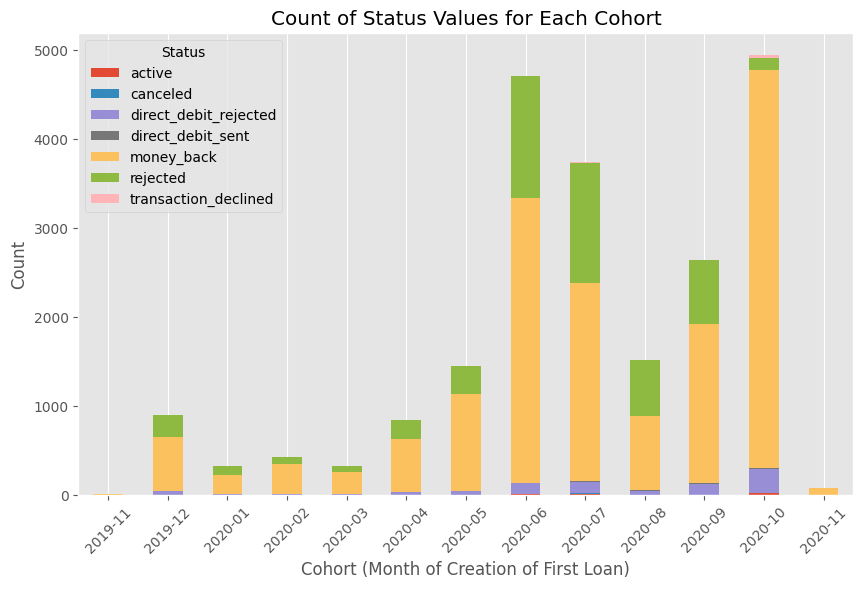

In [35]:
# Stacked Bar Chart
cohort_status_counts_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Count of Status Values for Each Cohort')
plt.xlabel('Cohort (Month of Creation of First Loan)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.grid(axis='y')
plt.show()

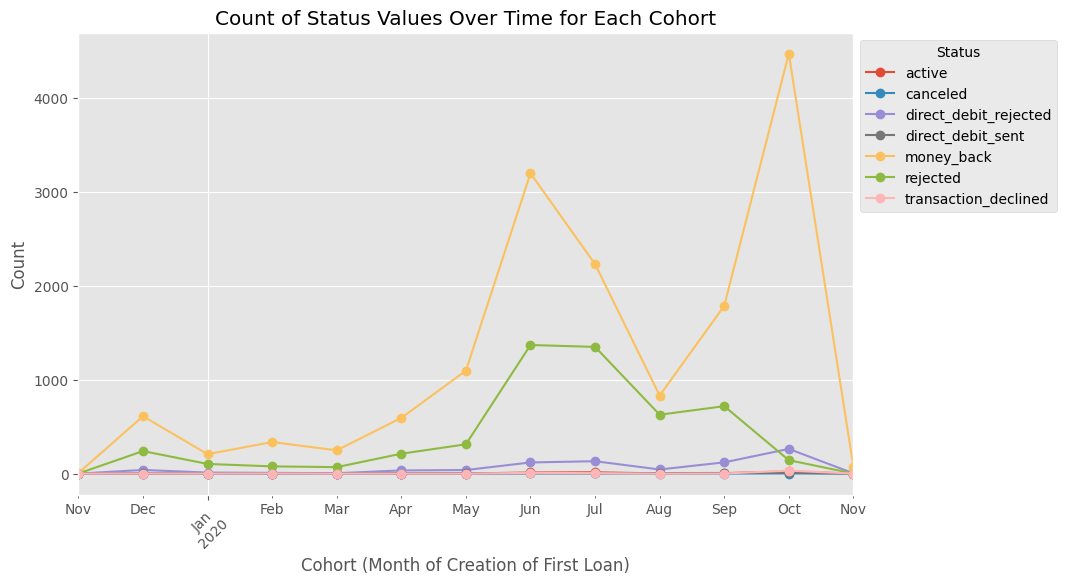

In [36]:
# Line Chart
cohort_status_counts_pivot.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Count of Status Values Over Time for Each Cohort')
plt.xlabel('Cohort (Month of Creation of First Loan)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In [37]:
cash.head(5)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,first_loan_month
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-05


<Axes: title={'center': 'Top 10 months for first loans'}, xlabel='first_loan_month'>

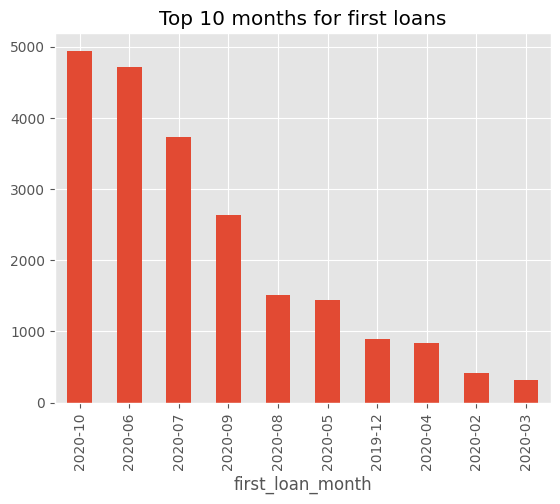

In [38]:
cash['first_loan_month'].value_counts() \
.head(10) \
.plot(kind = 'bar', title = 'Top 10 months for first loans')

<Axes: ylabel='Frequency'>

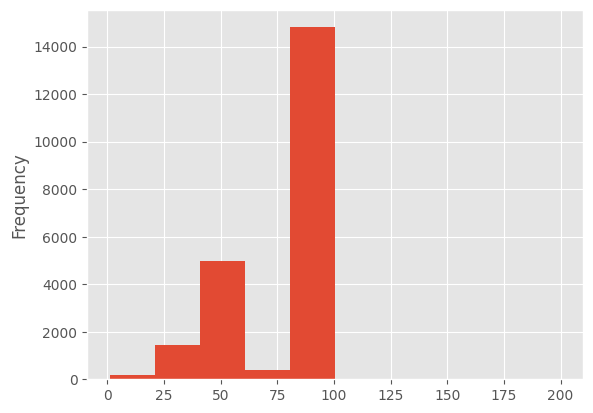

In [39]:
cash['amount'].plot(kind = 'hist', bins = 10)

<Axes: xlabel='amount', ylabel='status'>

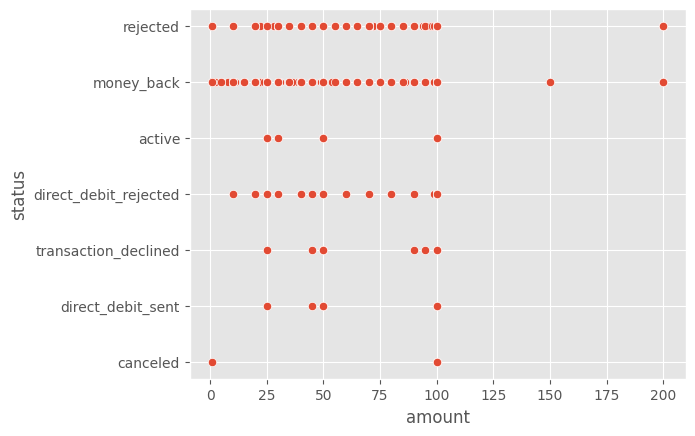

In [40]:
### Feature relationships - how do different features relate to each other

sns.scatterplot(x = 'amount', y = 'status', data = cash)


In [42]:
fees.head(5)

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


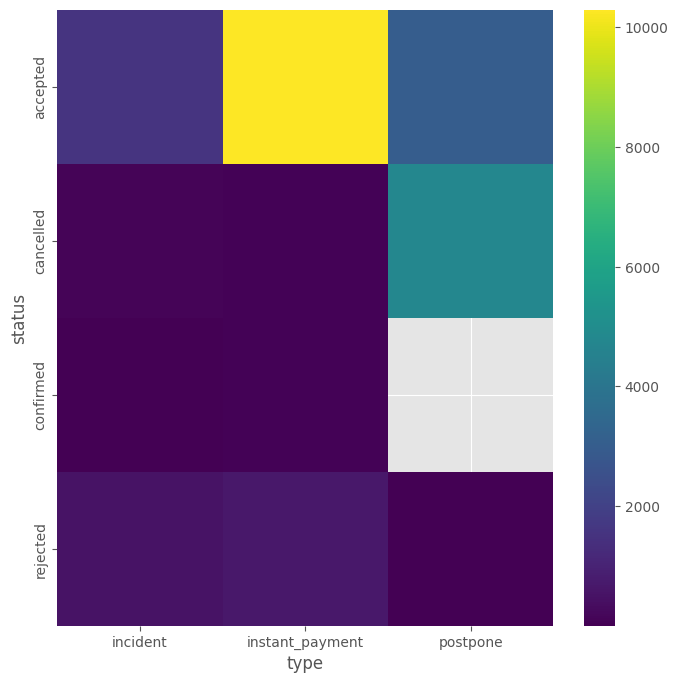

In [43]:
# @title type vs status

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['status'].value_counts()
    for x_label, grp in fees.groupby('type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('type')
_ = plt.ylabel('status')

In [44]:
# Check if the two datasets cash and fees share any columns in common

columns_cash = cash.columns
columns_fees = fees.columns

common_columns = set(columns_cash) & set(columns_fees)

common_columns

{'created_at', 'id', 'status', 'updated_at'}

In [45]:
#Compare rows

columns_compared = cash['created_at'].equals(fees['created_at'])

columns_compared

False

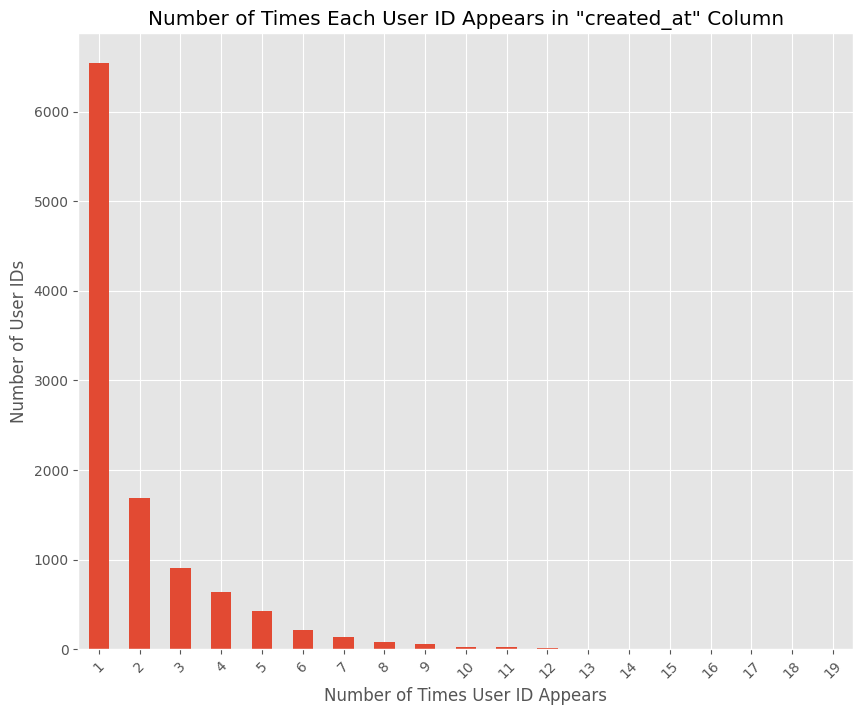

In [46]:
# Count occurrences of each user ID in the 'created_at' column
user_counts = cash['user_id'].value_counts()

# Count the occurrences of each count (i.e., number of times a user ID appears)
count_counts = user_counts.value_counts().sort_index()

# Plot a bar chart
plt.figure(figsize=(10, 8))
count_counts.plot(kind='bar')
plt.title('Number of Times Each User ID Appears in "created_at" Column')
plt.xlabel('Number of Times User ID Appears')
plt.ylabel('Number of User IDs')
plt.xticks(rotation=45)
plt.show()

In [47]:
cash.head(5)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,first_loan_month
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-05


In [48]:
cash.groupby('first_loan_month')['amount'].agg(['mean', 'min', 'max', 'sum'])

,mean,min,max,sum
first_loan_month,,,,
2019-11,29.000000,1.0,100.0,232.0
2019-12,94.939530,1.0,100.0,84781.0
2020-01,96.897196,50.0,100.0,31104.0
2020-02,94.035461,1.0,200.0,39777.0
2020-03,97.693498,10.0,200.0,31555.0
2020-04,94.338095,1.0,200.0,79244.0
2020-05,92.931677,1.0,200.0,134658.0
2020-06,90.327107,1.0,200.0,425531.0
2020-07,85.910843,10.0,100.0,320877.0


In [49]:
cash['amount'].sum()

1807116.0